**Problem Statement**

A dataset is given with details like Airline, Total Stops, Flight duration, Flight Source, Flight Destination, Flight Time etc.
We have to predict approximate Fare or Price for the ticket of the flight.

**Dataset**

The dataset is taken from Kaggle https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

In [54]:
!pip install catboost

# Step 1 - Importing the Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# Step 2 - Importing the dataset


In [56]:
data = pd.read_excel('/content/drive/My Drive/Data Science Projects/Data_Train.xlsx') # Data is in excel file
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Step 3 - Getting some information of data

In [57]:
info = data.info()

data['Duration'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
40h 20m      1
47h 40m      1
36h 25m      1
41h 20m      1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

# Step 4 - Dealing with Null values

In [58]:

total_null = data.isnull().sum()
print(total_null)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [59]:
data.dropna(inplace = True)
total_null = data.isnull().sum()
print(total_null)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


# Step 5 -  Dealing with Date of Journey Column


In [60]:
data['Journey_day'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day # Splitting out day of Journey
data['Journey_month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month # Splitting out month of Journey

data = data.drop(['Date_of_Journey'], axis = 1) # Deleting Date_of_Journey column as it is no longer needed
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Step 6 - Dealing with Departure Time column


In [61]:
data['Dep_hour'] = pd.to_datetime(data.Dep_Time).dt.hour # Splitting out departure hour
data['Dep_min'] = pd.to_datetime(data.Dep_Time).dt.minute # Splitting out departure minute

data = data.drop(['Dep_Time'], axis = 1)  # Dropping Dep_Time column as it is no longer needed


In [62]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


# Step 7 - Dealing with Arrival Time column


In [63]:
data['Arrival_hour'] = pd.to_datetime(data.Arrival_Time).dt.hour # Splitting out Arrival hour
data['Arrival_min'] = pd.to_datetime(data.Arrival_Time).dt.minute # Splitting out Arrival min

data = data.drop(['Arrival_Time'], axis = 1) # Dropping Arrival_Time as it is no longer needed
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# Step 8 - Dealing with Duration column

In [64]:
duration = list(data['Duration'])

for i in range (len(duration)):
  
  if(len(duration[i].split(' '))!=2):
    
    if('h' in duration[i]):
      duration[i] = duration[i].strip() +' 0m'
    else:
      duration[i] = '0h ' + duration[i].strip()
    
duration_hours = []
duration_mins = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split('h')[0]))
  duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins

data = data.drop(['Duration'], axis = 1)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Step 9 - Visualizing Airline, Source, Destination column with catplot

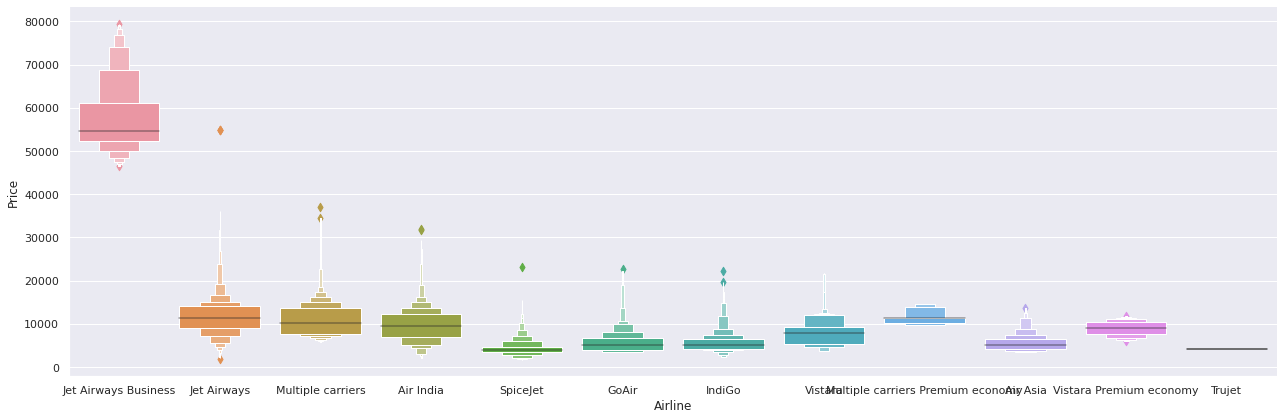

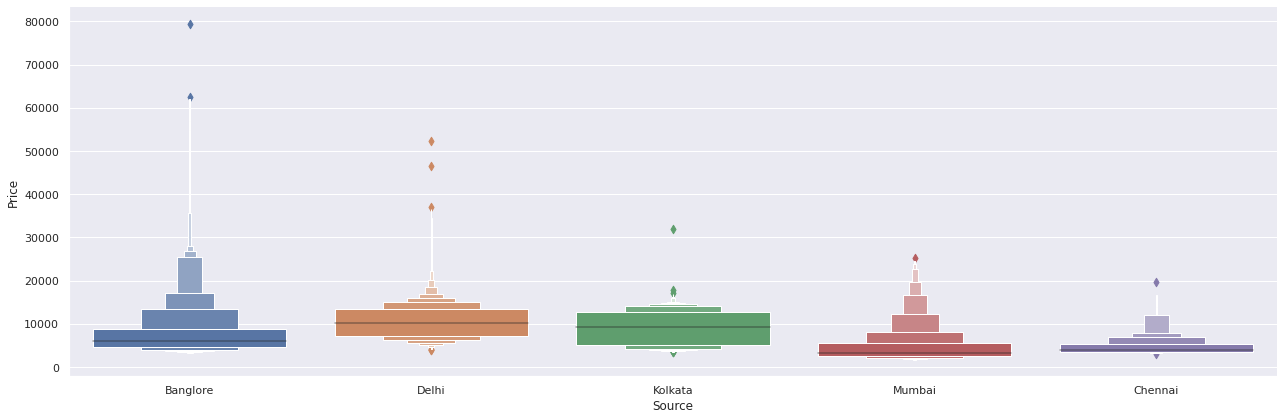

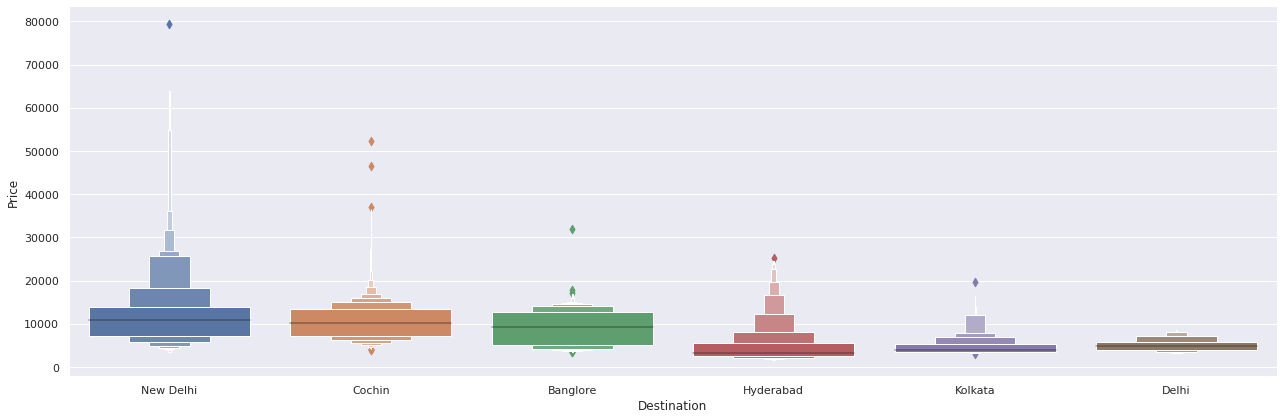

In [65]:
sb.catplot(y = "Price", x = "Airline", data = data.sort_values(by = "Price", ascending=False), kind = 'boxen', height = 6, aspect = 3)
sb.catplot(y = "Price", x = "Source", data = data.sort_values(by = "Price", ascending=False), kind = 'boxen', height = 6, aspect = 3)
sb.catplot(y = "Price", x = "Destination", data = data.sort_values(by = "Price", ascending=False), kind = 'boxen', height = 6, aspect = 3)

**Observation**

Flight of Jet Airways Business seems to have average price higher than any other Airlines, thus it can be considered as an outlier.
The reason for this can be Jet Airways Buisness is a business class flight

# Step 10 - Dealing with Route and Additional_info columns

In [66]:
data['Additional_Info'].value_counts()
# Since total stops will tell us route info and more than 80% value in Additional_Info
# is No Info we can safely drop these 2 columns

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [67]:
data.drop(["Route","Additional_Info"], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# Step 11 - Dealing with Total Stops Column

In [68]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


# Step 12 - Creating X and Y

In [70]:
data.insert(0, column = "Price", value = data.pop('Price')) #to popup Price column and insert it at 0th index

X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [71]:
X.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,1,3,16,50,21,35,4,45


In [72]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Step 13 - Checking for correlation between data

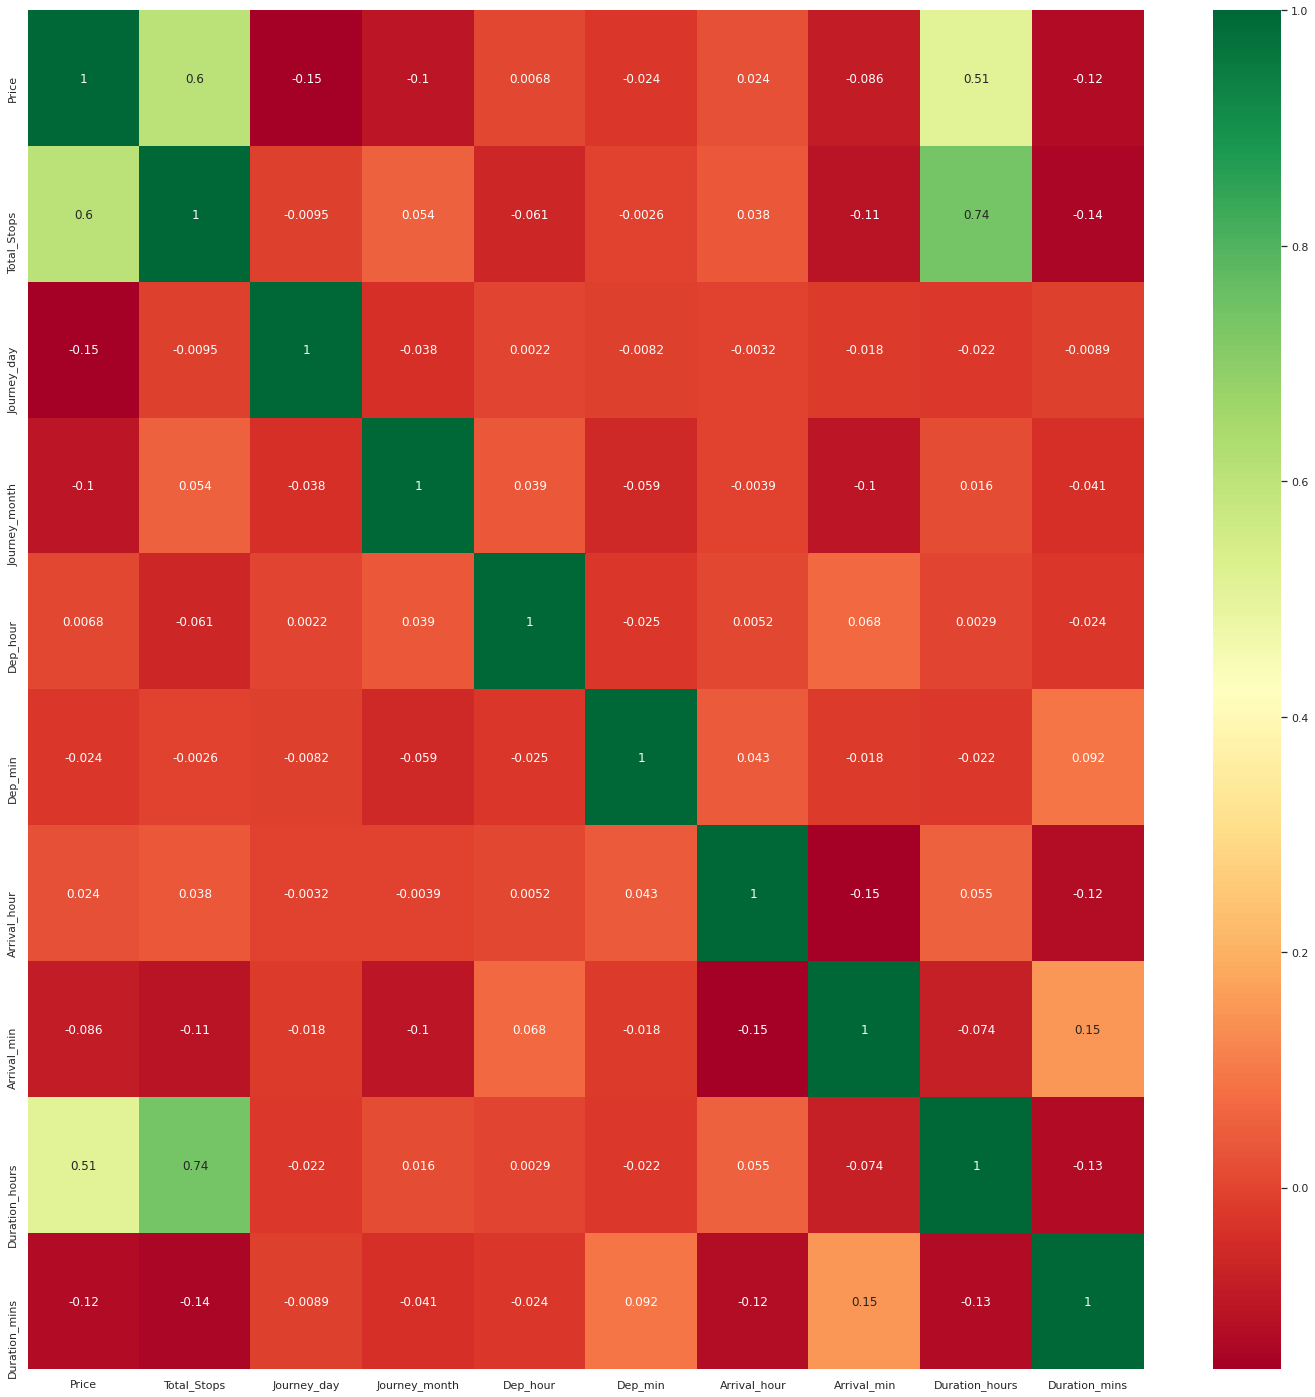

In [73]:
correlation = data.corr()

plt.figure(figsize = (25,25))
sb.heatmap(correlation, annot = True, cmap = "RdYlGn") #Green means very correlation red means less correlated

# Step 14 - Dividing dataset into Training and Test

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 9)

In [75]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
7361,IndiGo,Mumbai,Hyderabad,0,15,5,12,0,13,30,1,30
4279,Jet Airways,Kolkata,Banglore,1,1,4,20,0,22,35,26,35
286,IndiGo,Banglore,Delhi,0,12,5,16,55,19,55,3,0
3815,Air India,Delhi,Cochin,3,21,3,5,15,19,15,38,0
8175,Jet Airways,Kolkata,Banglore,1,1,5,14,5,22,35,8,30


In [76]:
Y_train.head()

7361     2754
4279    12681
286      4823
3815     9128
8175    10844
Name: Price, dtype: int64

# Step 15 - One Hot Encoding the data

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0, 1, 2])] , remainder = 'passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 16 - Checking and evaluating different Machine Learning models

In [86]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, Y_train)


Learning rate set to 0.05718
0:	learn: 4510.0906473	total: 2.35ms	remaining: 2.35s
1:	learn: 4360.6646408	total: 4.83ms	remaining: 2.41s
2:	learn: 4224.7511383	total: 6.81ms	remaining: 2.26s
3:	learn: 4111.2818084	total: 8.6ms	remaining: 2.14s
4:	learn: 3992.2503659	total: 10.5ms	remaining: 2.09s
5:	learn: 3879.4158972	total: 12.4ms	remaining: 2.05s
6:	learn: 3787.9125355	total: 14.3ms	remaining: 2.02s
7:	learn: 3700.7686971	total: 16.1ms	remaining: 2s
8:	learn: 3607.7934516	total: 18.2ms	remaining: 2s
9:	learn: 3534.7939139	total: 20.1ms	remaining: 1.99s
10:	learn: 3452.0028298	total: 22.1ms	remaining: 1.99s
11:	learn: 3374.6749643	total: 24ms	remaining: 1.98s
12:	learn: 3315.4139230	total: 25.7ms	remaining: 1.95s
13:	learn: 3263.9177962	total: 27.6ms	remaining: 1.94s
14:	learn: 3192.5378449	total: 29.6ms	remaining: 1.94s
15:	learn: 3134.2214023	total: 31.5ms	remaining: 1.94s
16:	learn: 3075.4232557	total: 33.4ms	remaining: 1.93s
17:	learn: 3029.0677960	total: 35.3ms	remaining: 1.92s


In [79]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

[17:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Step 17 - Checking accuracies of models


Streaming output truncated to the last 5000 lines.
8:	learn: 3649.5194542	total: 16.3ms	remaining: 1.8s
9:	learn: 3576.3604769	total: 17.9ms	remaining: 1.77s
10:	learn: 3493.8015107	total: 19.6ms	remaining: 1.77s
11:	learn: 3417.0301993	total: 21.5ms	remaining: 1.77s
12:	learn: 3356.2988907	total: 23.3ms	remaining: 1.77s
13:	learn: 3304.8835697	total: 24.8ms	remaining: 1.75s
14:	learn: 3246.8341172	total: 26.5ms	remaining: 1.74s
15:	learn: 3201.0491078	total: 28.2ms	remaining: 1.73s
16:	learn: 3142.2495040	total: 29.9ms	remaining: 1.73s
17:	learn: 3092.5196288	total: 31.6ms	remaining: 1.72s
18:	learn: 3050.3046375	total: 33.3ms	remaining: 1.72s
19:	learn: 3006.3839756	total: 34.9ms	remaining: 1.71s
20:	learn: 2961.0910462	total: 36.6ms	remaining: 1.71s
21:	learn: 2920.9089530	total: 38.2ms	remaining: 1.7s
22:	learn: 2881.8491882	total: 39.9ms	remaining: 1.69s
23:	learn: 2852.9857318	total: 41.6ms	remaining: 1.69s
24:	learn: 2821.3198787	total: 43.2ms	remaining: 1.69s
25:	learn: 2796.36

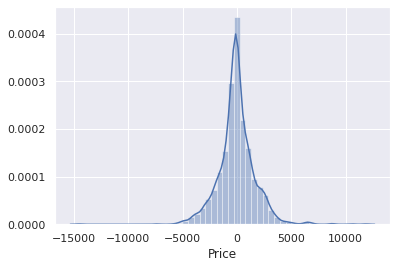

In [87]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 5)

yhat = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
accuracy = r2_score(Y_test, yhat)
mse = mean_squared_error(Y_test, yhat)

sb.distplot(Y_test-yhat) # It should be a normal distribution

print("Mean Accuracy " , accuracies.mean())
print("Test Accuracy", accuracy)
print("Mean Squared Error ", mse)

In [88]:
import pickle

with open("model.pkl", "wb") as filename:
  pickle.dump(regressor, filename)

**Conclusion**

Below is the details of how a good models performed

Linear Regression

Mean Accuracy  0.620758226383025
Test Accuracy 0.6070144036035918
Mean Squared Error  7705705.030958905

XGBoost

Mean Accuracy  0.7617199382677794
Test Accuracy 0.7778570403243867
Mean Squared Error  4355803.718154081

CatBoost

Mean Accuracy  0.8403858547215801
Test Accuracy 0.8545137067711921
Mean Squared Error  2852711.3256790964

We can clearly see that CatBoost outperforms other models , thus we will be choosing this model for further use and saving it as pickel file.